In [1]:
import pandas as pd
import xlwt

#全部行都能输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [9]:
'''
基于RFM模型使用K-Means算法聚类航空客户消费行为特征数据
'''

'\n基于RFM模型使用K-Means算法聚类航空客户消费行为特征数据\n'

一、数据读取、清洗

In [3]:
data=pd.read_excel(r'i_nuc.xls',index_col='Id',sheet_name='Sheet2')
data.head()

,R,F,M
Id,,,
inuc001,21,17,1256.47
inuc002,1,19,1728.84
inuc003,8,4,617.83
inuc004,10,9,1380.94
inuc005,4,3,1783.68


In [4]:
#保存结果的文件名
outputfile = r'hangkong.xls'

In [5]:
k=3 #聚类的类别
iteration=1000 #聚类最大循环次数


二、标准化处理

In [6]:
biaozhunhua=r'biaozhunhua.xls'
data_bzh=1.0*(data-data.mean())/data.std()  #数据标准化
data_bzh.to_excel(biaozhunhua,index=False)  #数据写入备用

三、使用K-Means算法聚类消费行为特征数据，并导出各自类别的概率密度图

In [8]:
from sklearn.cluster import KMeans 
model = KMeans(n_clusters=3,max_iter=iteration)
model.fit(data_bzh)  #开始聚类

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
model.labels_

array([2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0,

In [11]:
model.cluster_centers_

array([[-0.16983711, -0.67328576, -0.30300919],
       [ 3.40563959, -0.29514754,  0.48760441],
       [-0.14091261,  1.0644544 ,  0.40606059]])

In [13]:
#简单打印结果
r1=pd.Series(model.labels_).value_counts() #统计各个类别的数目
r2=pd.DataFrame(model.cluster_centers_)    #找出聚类中心
r= pd.concat([r2,r1],axis=1)        #横向连接，0是纵向，得到聚类中心对应类别下的数目

r
r.columns=list(data.columns)+[u'聚类数目']   #重命名表头
r

,0,1,2,0
0,-0.169837,-0.673286,-0.303009,520
1,3.405640,-0.295148,0.487604,40
2,-0.140913,1.064454,0.406061,340


,R,F,M,聚类数目
0,-0.169837,-0.673286,-0.303009,520
1,3.405640,-0.295148,0.487604,40
2,-0.140913,1.064454,0.406061,340


In [12]:
list(data.columns)

['R', 'F', 'M']

In [14]:
data.head()
model.labels_

,R,F,M
Id,,,
inuc001,21,17,1256.47
inuc002,1,19,1728.84
inuc003,8,4,617.83
inuc004,10,9,1380.94
inuc005,4,3,1783.68


array([2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0,

In [16]:
#详细输出原始数据及其类别
r=pd.concat([data,pd.Series(model.labels_,index=data.index)],axis=1)

r.head()
#详细输出每个样本对应的类别
r.columns=list(data.columns)+[u'聚类类别']  #重命名表头
r.to_excel(outputfile)  #保存结果
r.head()

,R,F,M,0
Id,,,,
inuc001,21,17,1256.47,2
inuc002,1,19,1728.84,2
inuc003,8,4,617.83,0
inuc004,10,9,1380.94,0
inuc005,4,3,1783.68,0


,R,F,M,聚类类别
Id,,,,
inuc001,21,17,1256.47,2
inuc002,1,19,1728.84,2
inuc003,8,4,617.83,0
inuc004,10,9,1380.94,0
inuc005,4,3,1783.68,0


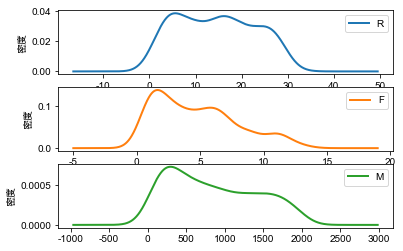

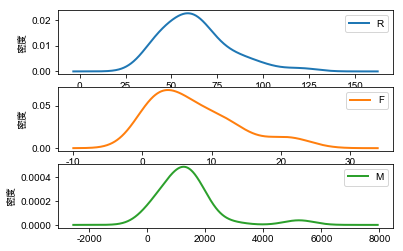

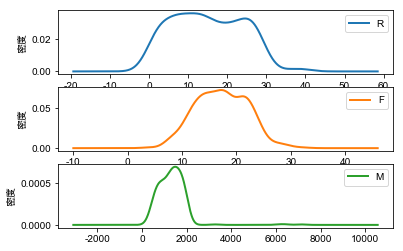

In [18]:
#自定义作图函数
def density_plot(data):
    import matplotlib.pyplot as plt

    plt.rcParams['font.family'] ='Arial Unicode MS' #mac版设置支持中文字体显示
    plt.rcParams['axes.unicode_minus'] = False      #正常显示负号
    p=data.plot(kind='kde',linewidth=2,subplots=True,sharex=False)
    [p[i].set_ylabel(u'密度') for i in range(k)]
    plt.legend()#显示图中的标签
    
    return plt

pic_output=r'pd_'  #概率密度图文件名前缀
for i in range(k):
    density_plot(data[r[u'聚类类别']==i]).savefig(u'%s%s.png' %(pic_output,i))